<a href="https://colab.research.google.com/github/ravij25/Earth-quake-prediction-model-using-LSTM-an-AI-Deep-Learning-model/blob/main/best_final_LSTM_Earth_quake_next__2201___60_days_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [443]:
import pandas as pd
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [444]:
# Loading the earthquake data
df = pd.read_csv('https://raw.githubusercontent.com/ravij25/turkey-earth-quake-prediction/main/Catalogue.csv')


In [445]:
data = pd.DataFrame(list(df['Magnitude']), index=df['Date'])

In [446]:
df= df.sort_values(by="Date")

In [447]:
df

,Index,Date,Time (UTC),Latitude,Longitude,Depth,Type,Magnitude
12064,12065,1/1/1904,11:38:00 AM,37.8000,29.1000,20.00,MS,4.8
12063,12064,1/1/1904,10:00:00 PM,38.8300,38.6900,10.00,MS,5.0
10880,10881,1/1/1953,10:17:22 AM,35.6800,26.1300,40.00,MS,4.8
9741,9742,1/1/1969,9:41:29 PM,36.4600,23.1000,47.00,mb,4.4
9243,9244,1/1/1971,8:11:33 PM,34.5724,25.5741,57.70,mb,4.0
...,...,...,...,...,...,...,...,...
1590,1591,9/9/2012,7:26:06 AM,36.8500,24.4700,122.00,mb,4.3
947,948,9/9/2016,5:24:19 PM,36.7788,25.2975,7.26,Mw,4.2
595,596,9/9/2018,11:54:00 PM,35.0610,45.6060,15.00,Mw,4.2
458,459,9/9/2019,9:56:00 AM,38.5275,44.2438,21.26,Mw,4.3


In [448]:
data = pd.DataFrame(list(df['Magnitude']), index=df['Date'], columns=['Magnitude'])

In [449]:
data

,Magnitude
Date,
1/1/1904,4.8
1/1/1904,5.0
1/1/1953,4.8
1/1/1969,4.4
1/1/1971,4.0
...,...
9/9/2012,4.3
9/9/2016,4.2
9/9/2018,4.2


In [612]:
df=data[10000:]

In [613]:
df

,Magnitude
Date,
2005-07-30,5.2
2006-07-30,4.0
2009-07-30,5.0
2011-07-30,4.4
2013-07-30,4.1
...,...
2012-09-09,4.3
2016-09-09,4.2
2018-09-09,4.2


In [614]:
df.shape

(2201, 1)

In [615]:
df.isnull().sum()

Magnitude    0
dtype: int64

In [616]:
df=df.dropna(axis=0)

In [617]:
df.shape

(2201, 1)

In [618]:
df=df['Magnitude'].values

In [622]:
df[:5]

array([5.2, 4. , 5. , 4.4, 4.1])

In [623]:
df=df.reshape(-1,1)

In [624]:
df

array([[5.2],
       [4. ],
       [5. ],
       ...,
       [4.2],
       [4.3],
       [4.1]])

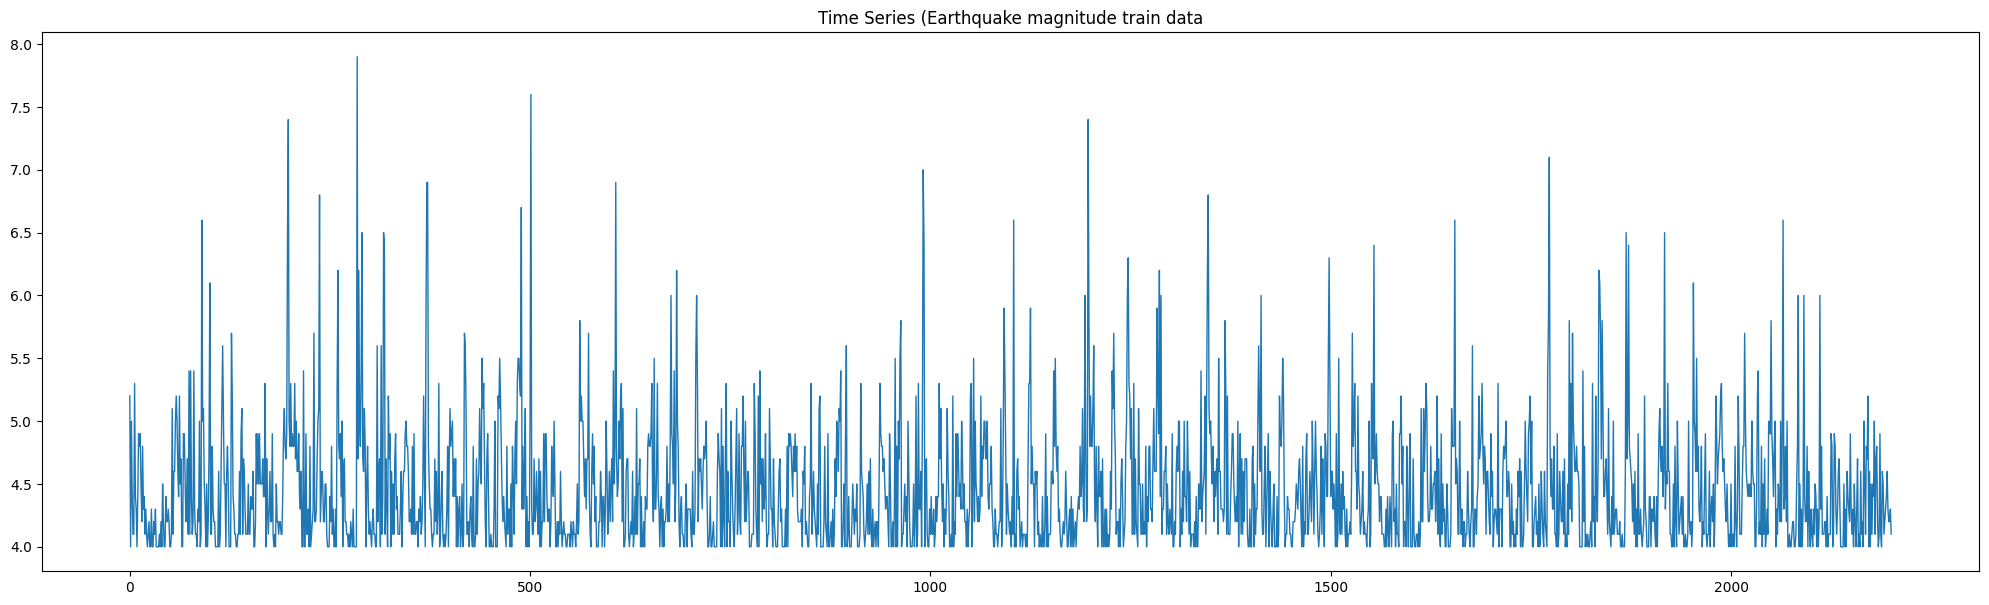

In [625]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
# plt.grid()
plt.title("Time Series (Earthquake magnitude train data")
plt.show()

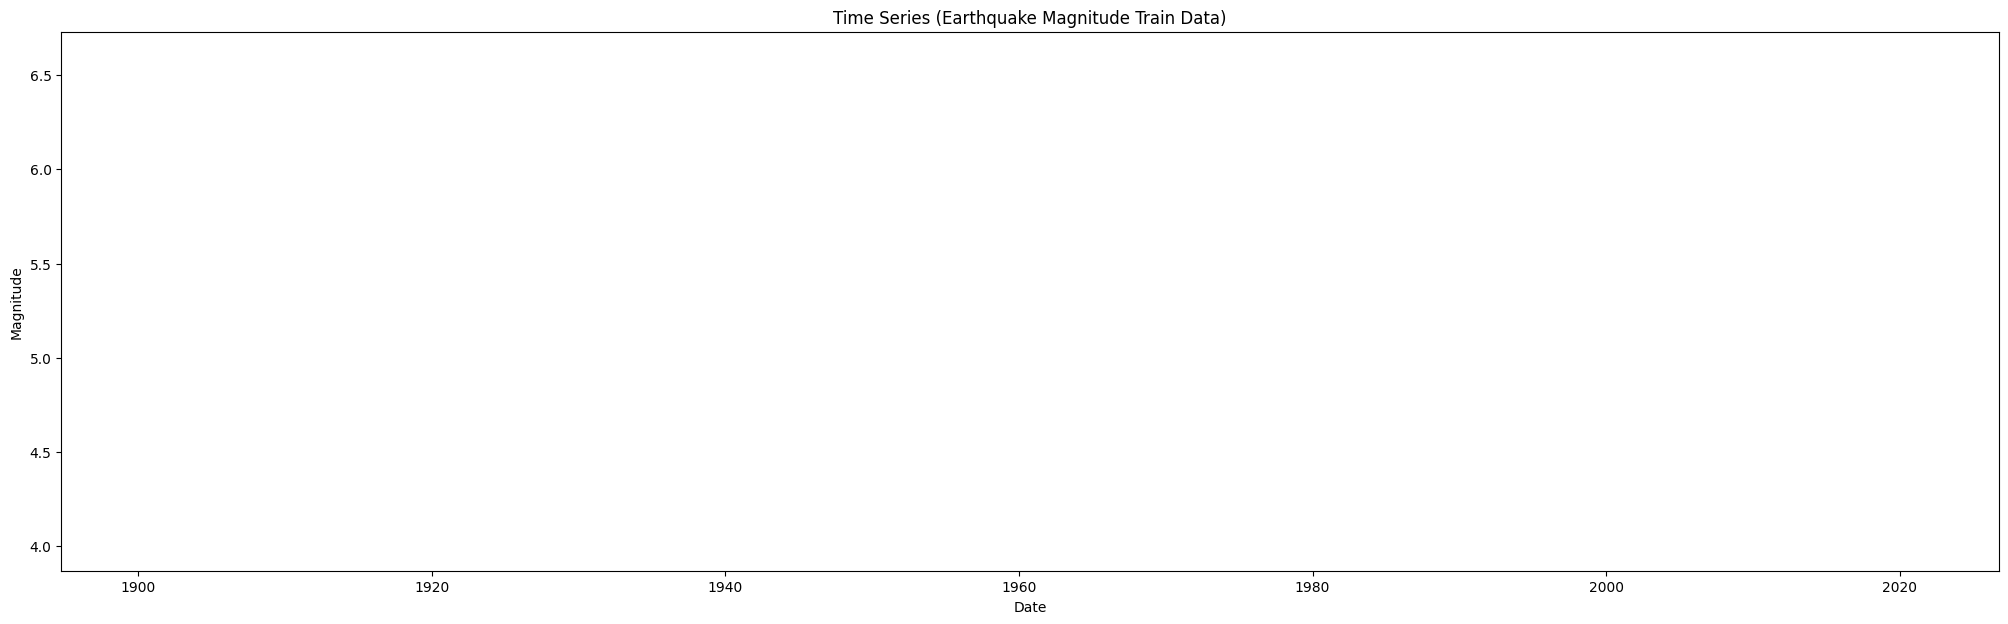

In [626]:
# convert the index to a datetime index
data.index = pd.to_datetime(data.index)

# select the earthquake magnitude data starting from index 11471
df6 = data[11471:12201]
# resample the data to yearly intervals and select the magnitude column
yearly_data = df6.resample('M').mean()['Magnitude']

# plot the time series data
plt.figure(figsize=(25, 7))
plt.plot(yearly_data, linewidth=1)
plt.title("Time Series (Earthquake Magnitude Train Data)")
plt.xlabel("Date")
plt.ylabel("Magnitude")
plt.show()

In [627]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

In [628]:
data_scaled[:5]

array([[0.30769231],
       [0.        ],
       [0.25641026],
       [0.1025641 ],
       [0.02564103]])

In [629]:
data_scaled.shape

(2201, 1)

In [630]:
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [631]:
out[:10]

[array([0.07692308]),
 array([0.02564103]),
 array([0.]),
 array([0.02564103]),
 array([0.05128205]),
 array([0.]),
 array([0.]),
 array([0.07692308]),
 array([0.]),
 array([0.])]

In [632]:
import numpy as np

In [633]:
inp= np.asanyarray(inp)
out= np.asanyarray(out)

In [634]:
len(df)*0.65

1430.65

In [667]:
x_train = inp[:2000,:,:]
x_test = inp[2000:,:,:]    
y_train = out[:2000]    
y_test= out[2000:]

In [668]:
inp.shape

(2181, 20, 1)

In [669]:
x_train.shape

(2000, 20, 1)

In [670]:
x_test.shape

(181, 20, 1)

In [671]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [672]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [673]:

model.fit(x_train, y_train, epochs=300,verbose=1,)

Epoch 1/300
63/63 [==============================] - 10s 56ms/step - loss: 0.0173
Epoch 2/300
63/63 [==============================] - 3s 41ms/step - loss: 0.0160
Epoch 3/300
63/63 [==============================] - 2s 37ms/step - loss: 0.0156
Epoch 4/300
63/63 [==============================] - 2s 38ms/step - loss: 0.0154
Epoch 5/300
63/63 [==============================] - 2s 38ms/step - loss: 0.0152
Epoch 6/300
63/63 [==============================] - 4s 56ms/step - loss: 0.0151
Epoch 7/300
63/63 [==============================] - 3s 39ms/step - loss: 0.0150
Epoch 8/300
63/63 [==============================] - 2s 38ms/step - loss: 0.0149
Epoch 9/300
63/63 [==============================] - 2s 38ms/step - loss: 0.0147
Epoch 10/300
63/63 [==============================] - 2s 37ms/step - loss: 0.0146
Epoch 11/300
63/63 [==============================] - 3s 55ms/step - loss: 0.0146
Epoch 12/300
63/63 [==============================] - 3s 40ms/step - loss: 0.0145
Epoch 13/300
63/63 [====

In [674]:
# model.evaluate(x_test, y_test)


In [675]:
#Predictions and Model evaluation
#Predictions on training set#

In [676]:
print("Predicted Value",model.predict(x_train)[4][0])
print("Expected value",y_train[4][0])

63/63 [==============================] - 2s 12ms/step
Predicted Value 0.03830317
Expected value 0.05128205128205132


In [677]:
predictions=model.predict(x_test)

6/6 [==============================] - 0s 11ms/step


In [678]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R-squared: -1.0369
MSE: 0.0247


In [679]:
print("Predicted Value",predictions[2][0])
print("Expected Value",y_test[2][0])

Predicted Value 0.054663595
Expected Value 0.1282051282051282


In [680]:
predictions.shape

(181, 1)

In [681]:
y_test.shape

(181, 1)

In [682]:
pred_df=pd.DataFrame(predictions)

In [683]:
pred_df['TrueValues']=y_test

In [684]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

In [685]:
pred_df_new

,Predictions,TrueValues
0,0.229490,0.128205
1,0.074368,0.102564
2,0.054664,0.128205
3,0.029692,0.102564
4,0.096890,0.128205
...,...,...
176,0.087274,0.076923
177,0.128170,0.051282
178,0.177671,0.051282
179,0.038948,0.076923


In [686]:
type(pred_df_new)

pandas.core.frame.DataFrame

In [687]:
# Convert NumPy array to Pandas DataFrame
pred = pd.DataFrame(pred_df_new, columns=['Predictions', 'TrueValues'])

# Display DataFrame
print(pred)

     Predictions  TrueValues
0       0.229490    0.128205
1       0.074368    0.102564
2       0.054664    0.128205
3       0.029692    0.102564
4       0.096890    0.128205
..           ...         ...
176     0.087274    0.076923
177     0.128170    0.051282
178     0.177671    0.051282
179     0.038948    0.076923
180     0.030585    0.025641

[181 rows x 2 columns]


<Figure size 2700x800 with 0 Axes>

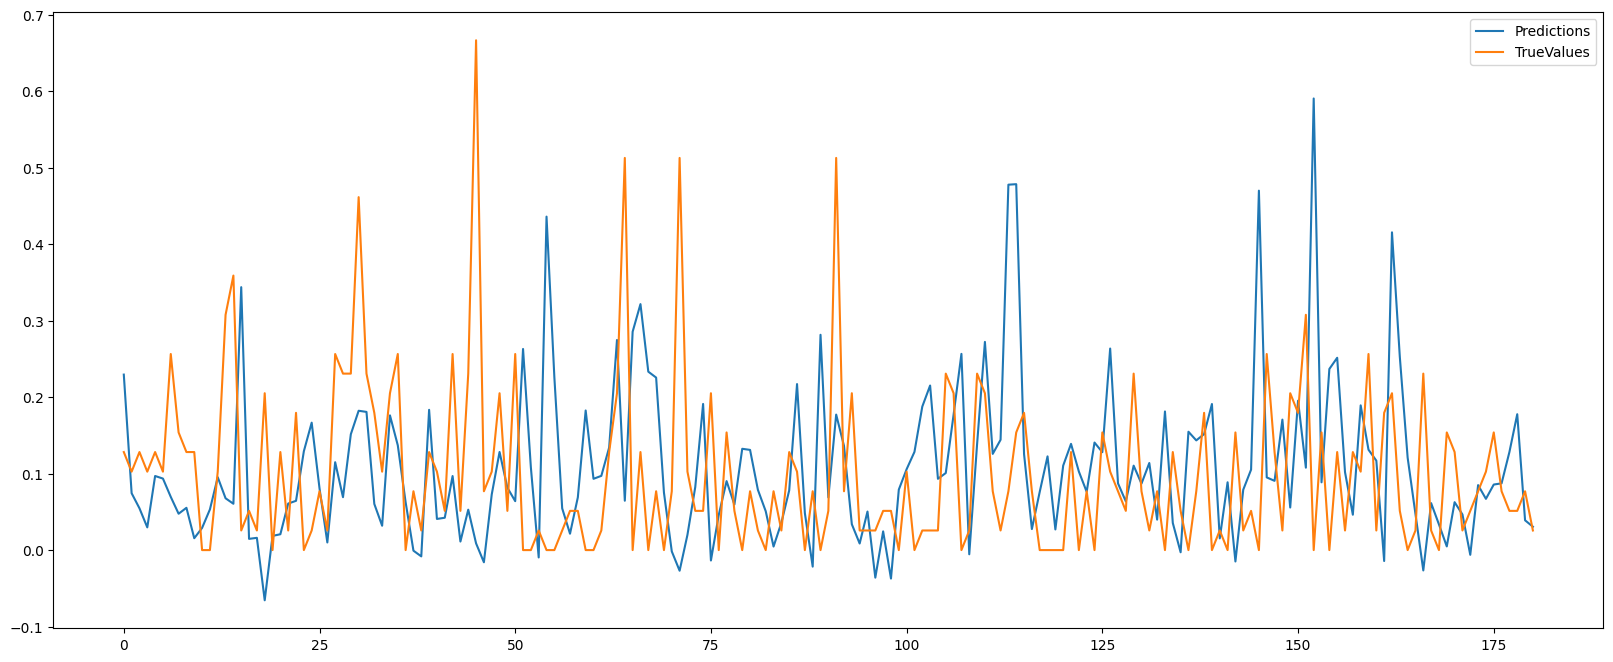

<Figure size 2700x800 with 0 Axes>

In [688]:

pred.plot(y=['Predictions', 'TrueValues'],  kind='line', figsize=(20,8))
plt.figure(figsize=(27,8))

Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

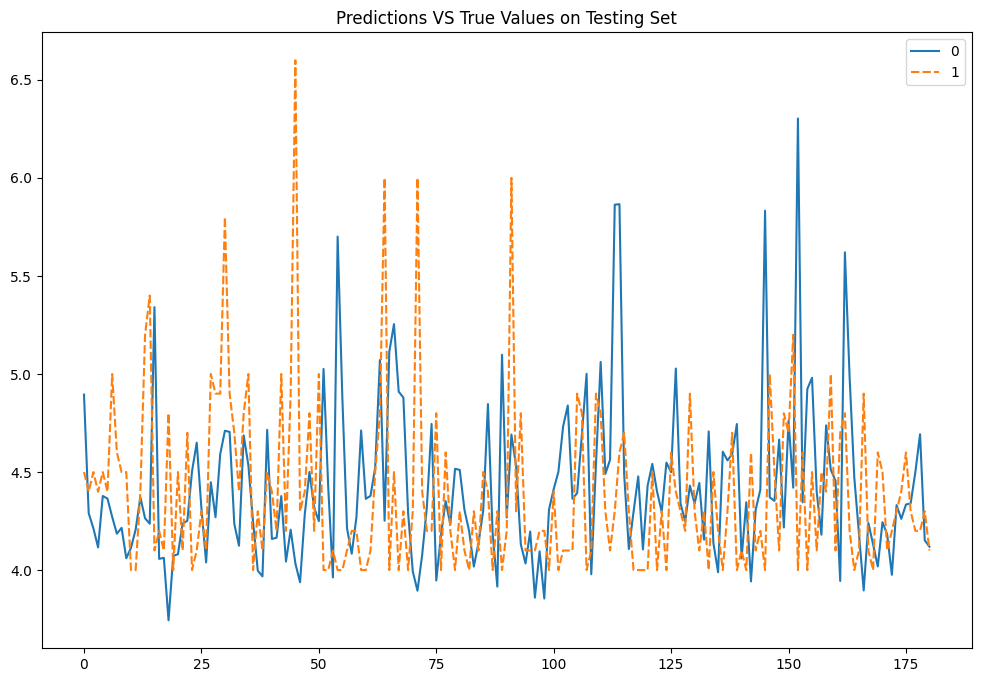

In [689]:
pred_df_new=scaler.inverse_transform(pred_df_new)
plt.figure(figsize=(12,8))
sns.lineplot(data= pred_df_new[:365])
plt.title("Predictions VS True Values on Testing Set")

In [690]:
#Earthquake Predictions for next 30 Days
#we are using last 10 days input for 1st day output

In [691]:
data_scaled.shape


(2201, 1)

In [692]:
x_input=data_scaled[:20]

In [693]:
x_input.shape

(20, 1)

In [694]:
# now reshaping the data
x_input = x_input.reshape(1, -1)

In [695]:
x_input.shape

(1, 20)

In [696]:
# x_input = x_input.reshape((1, 20,1))
# yhat = model.predict(x_input, verbose=0)

In [697]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [698]:
#creatitng a functions which returns the next 30 days prediction

In [699]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<60):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07818172]
1 day input [0.         0.25641026 0.1025641  0.02564103 0.02564103 0.33333333
 0.1025641  0.07692308 0.         0.1025641  0.23076923 0.20512821
 0.23076923 0.12820513 0.05128205 0.20512821 0.07692308 0.1025641
 0.02564103 0.07818172]
1 day output [[0.02100689]]
2 day input [0.25641026 0.1025641  0.02564103 0.02564103 0.33333333 0.1025641
 0.07692308 0.         0.1025641  0.23076923 0.20512821 0.23076923
 0.12820513 0.05128205 0.20512821 0.07692308 0.1025641  0.02564103
 0.07818172 0.02100689]
2 day output [[0.02012831]]
3 day input [0.1025641  0.02564103 0.02564103 0.33333333 0.1025641  0.07692308
 0.         0.1025641  0.23076923 0.20512821 0.23076923 0.12820513
 0.05128205 0.20512821 0.07692308 0.1025641  0.02564103 0.07818172
 0.02100689 0.02012831]
3 day output [[0.02336013]]
4 day input [0.02564103 0.02564103 0.33333333 0.1025641  0.07692308 0.
 0.1025641  0.23076923 0.20512821 0.23076923 0.12820513 0.05128205
 0.20512821 0.07692308 0.1025641  0.02564103 0.07818172 

In [706]:
day_new = np.arange(1,60)
day_pred = np.arange(60,90)

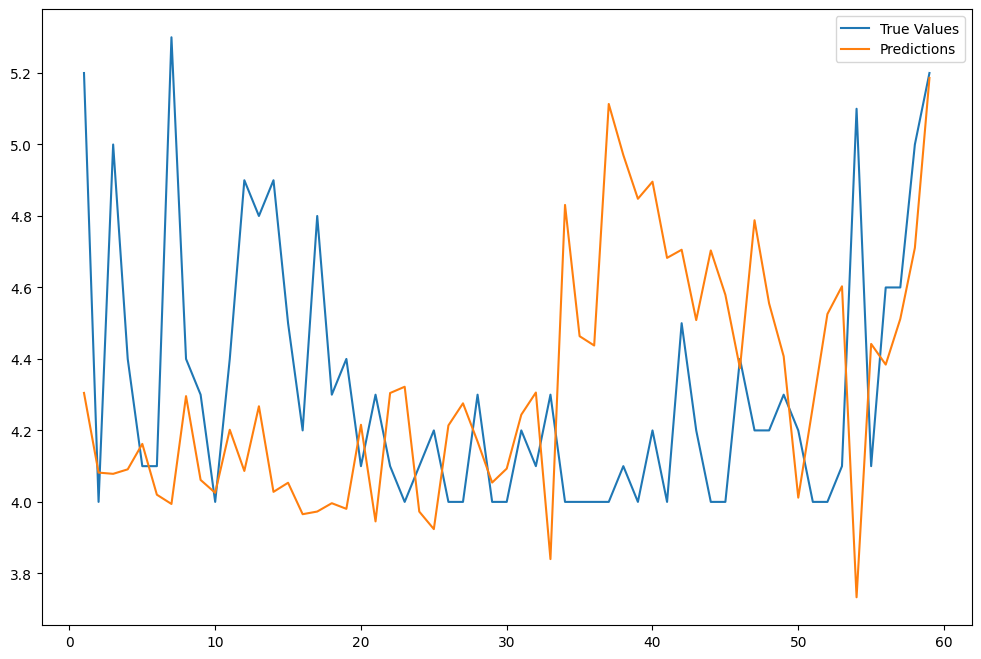

In [707]:
# Inverse transform the scaled data
data_unscaled = scaler.inverse_transform(data_scaled)

# Inverse transform the predicted values
lst_output_unscaled = scaler.inverse_transform(lst_output)

plt.figure(figsize=(12, 8))
plt.plot(day_new[:59], data_unscaled[:59], label='True Values')
plt.plot(day_new[:59], lst_output_unscaled[:-1], label='Predictions')
plt.legend()
plt.show()


In [708]:
data_scaled[:5]

array([[0.30769231],
       [0.        ],
       [0.25641026],
       [0.1025641 ],
       [0.02564103]])

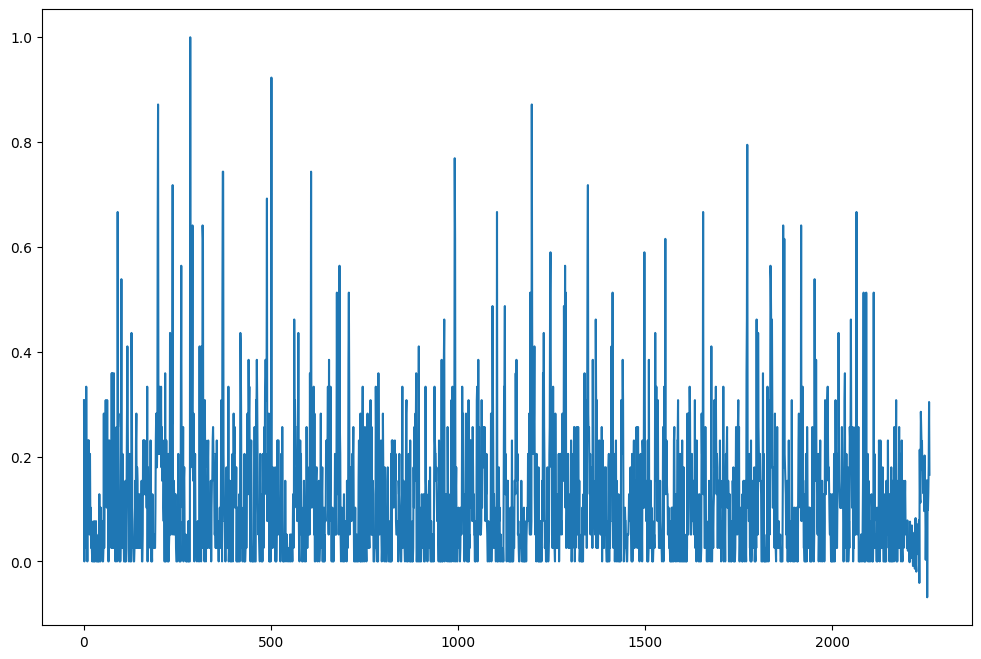

In [709]:
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)

ValueError: ignored

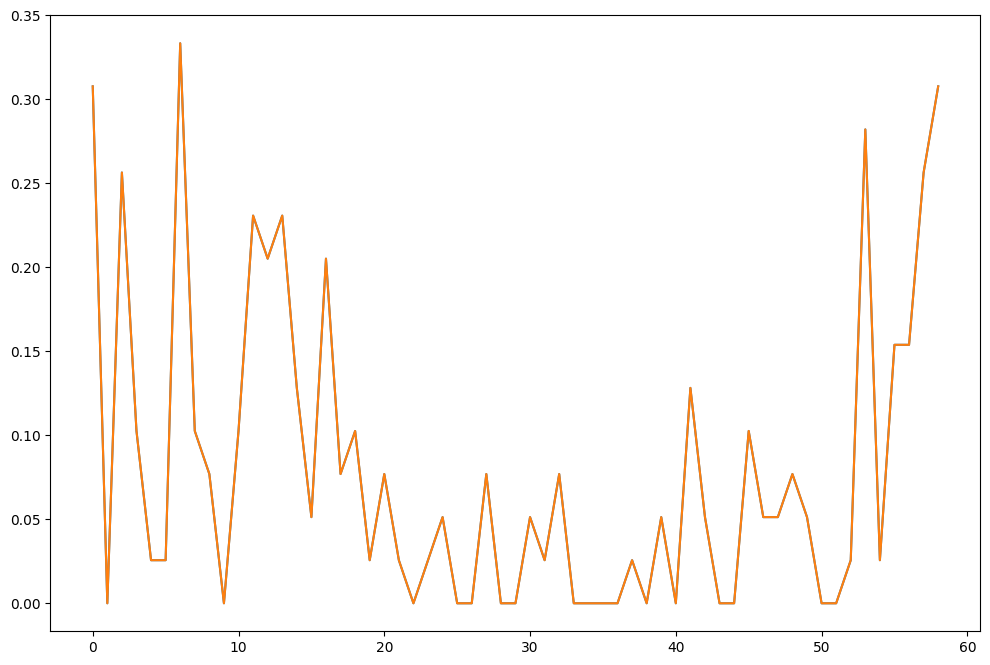

In [710]:
# Convert data_scaled to list and extend with lst_output
df3 = data_scaled.tolist()
df3.extend(lst_output)

# Plot the combined data
plt.figure(figsize=(12, 8))
plt.plot(df3[:59], label='Combined Data')
plt.plot(data_scaled[:59], label='True Values')
plt.plot(range(59, 59 + n_steps), lst_output[:-1], label='Predictions')
plt.legend()
plt.show()
